# LSTM on Pynq
This notebook covers how to use the FPGA-accelerated BiLSTM implementation on PYNQ to perform optical character recognition (OCR). The BiLSTM has been trained on a simple dataset (here called *plain*) of a few hundreds sentences.

In [1]:
import lstm

## 1. Load a line of text
Load a line of text that we are going to use as an example.

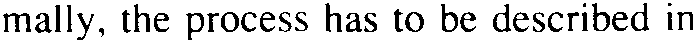

In [2]:
from PIL import Image
im = Image.open('/home/xilinx/jupyter_notebooks/lstm/Plain_images/010077.bin.png')
im

## 2. Hardware accelerated OCR
For this set of experiments, we trained the same BiLSTM architecture on the same dataset at different precisions. In the following cells, we show how performances scale with respect to the chosen precision: lowering precision allows to better parallelize our FPGA implementation of the model, thus reducing the overall inference time, at a negligible-to-none cost in terms of accuracy.

### Case 1
**Weights**: *4 bits*
**Activations**: *8 bits*
**Parallelism**: *1x*

In [3]:
W4A8_hw_ocr = lstm.PynqPlainOCR(network="W4A8", runtime=lstm.RUNTIME_HW)
W4A8_hw_result = W4A8_hw_ocr.inference(im)
W4A8_hw_mops_per_s, W4A8_hw_ms_inference_time, W4A8_hw_recognized_text = W4A8_hw_result
W4A8_hw_ocr.cleanup()

print("W4A8 HW OCRed text: {}".format(W4A8_hw_recognized_text))
print("W4A8 HW MOps/s: {}".format(W4A8_hw_mops_per_s))
print("W4A8 HW inference time [ms]: {}".format(W4A8_hw_ms_inference_time))

W4A8 HW OCRed text: mally, the process has to be described in
W4A8 HW MOps/s: 16481.11213485034
W4A8 HW inference time [ms]: 11.089892387390137


### Case 2
**Weights**: *4 bits*
**Activations**: *4 bits*
**Parallelism**: *4x*

In [4]:
W4A4_hw_ocr = lstm.PynqPlainOCR(network="W4A4", runtime=lstm.RUNTIME_HW)
W4A4_hw_result = W4A4_hw_ocr.inference(im)
W4A4_hw_mops_per_s, W4A4_hw_ms_inference_time, W4A4_hw_recognized_text = W4A4_hw_result
W4A4_hw_ocr.cleanup()

print("W4A4 HW OCRed text: {}".format(W4A4_hw_recognized_text))
print("W4A4 HW MOps/s: {}".format(W4A4_hw_mops_per_s))
print("W4A4 HW inference time [ms]: {}".format(W4A4_hw_ms_inference_time))

W4A4 HW OCRed text: mally, the process has to be described in
W4A4 HW MOps/s: 61789.578061051216
W4A4 HW inference time [ms]: 2.958003044128418


### Case 3
**Weights**: *2 bits*
**Activations**: *4 bits*
**Parallelism**: *4x*

In [5]:
W2A4_hw_ocr = lstm.PynqPlainOCR(network="W2A4", runtime=lstm.RUNTIME_HW)
W2A4_hw_result = W2A4_hw_ocr.inference(im)
W2A4_hw_mops_per_s, W2A4_hw_ms_inference_time, W2A4_hw_recognized_text = W2A4_hw_result
W2A4_hw_ocr.cleanup()

print("W2A4 HW OCRed text: {}".format(W2A4_hw_recognized_text))
print("W2A4 HW MOps/s: {}".format(W2A4_hw_mops_per_s))
print("W2A4 HW inference time [ms]: {}".format(W2A4_hw_ms_inference_time))

W2A4 HW OCRed text: mally, the process has to be described in
W2A4 HW MOps/s: 61606.69599659392
W2A4 HW inference time [ms]: 2.9667840003967285


### Case 4
**Weights**: *2 bits* **Activations**: *2 bits* **Parallelism**: *8x*

In [6]:
W2A2_hw_ocr = lstm.PynqPlainOCR(network="W2A2", runtime=lstm.RUNTIME_HW)
W2A2_hw_result = W2A2_hw_ocr.inference(im)
W2A2_hw_mops_per_s, W2A2_hw_ms_inference_time, W2A2_hw_recognized_text = W2A2_hw_result
W2A2_hw_ocr.cleanup()

print("W2A2 HW OCRed text: {}".format(W2A2_hw_recognized_text))
print("W2A2 HW MOps/s: {}".format(W2A2_hw_mops_per_s))
print("W2A2 HW inference time [ms]: {}".format(W2A2_hw_ms_inference_time))

W2A2 HW OCRed text: mally, the process has to be described in
W2A2 HW MOps/s: 141296.245179383
W2A2 HW inference time [ms]: 1.2935500144958496


### Summary
Here is a comparison of the inference time for the hardware accelerated implementation at different precisions.

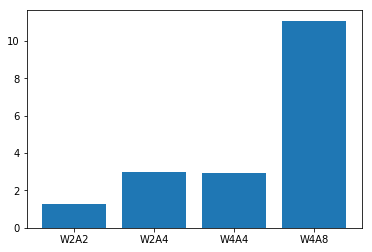

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

height = [W2A2_hw_ms_inference_time, 
          W2A4_hw_ms_inference_time, 
          W4A4_hw_ms_inference_time, 
          W4A8_hw_ms_inference_time]
bars = ('W2A2', 'W2A4', 'W4A4', 'W4A8')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

## 3. Software accelerated OCR
For the sake of comparison, we show here a software implementation for a given (W4A4) precision.

In [8]:
W4A4_sw_ocr = lstm.PynqPlainOCR(network="W4A4", runtime=lstm.RUNTIME_SW)
W4A4_sw_result = W4A4_sw_ocr.inference(im)
W4A4_sw_mops_per_s, W4A4_sw_ms_inference_time, W4A4_sw_recognized_text = W4A4_sw_result
W4A4_sw_ocr.cleanup()

print("W4A4 SW OCRed text: {}".format(W4A4_sw_recognized_text))
print("W4A4 SW MOps/s: {}".format(W4A4_sw_mops_per_s))
print("W4A4 SW inference time [ms]: {}".format(W4A4_sw_ms_inference_time))

W4A4 SW OCRed text: mally, the process has to be described in
W4A4 SW MOps/s: 2.4391782189015494
W4A4 SW inference time [ms]: 74932.515625
